# Problem Statement

1. Load the demo dataset in dataframe object df

2. Detect the outlier using ScatterPlot

3. Handle the outlier using Quantile based flooring and capping (Hint: the outlier is capped
at a certain value above the 90th percentile value or floored at a factor below the 10th
percentile value)

In [8]:
import pandas as pd
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(r"C:\Users\OM\Downloads\demo1.csv")

In [11]:
df.head()

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019


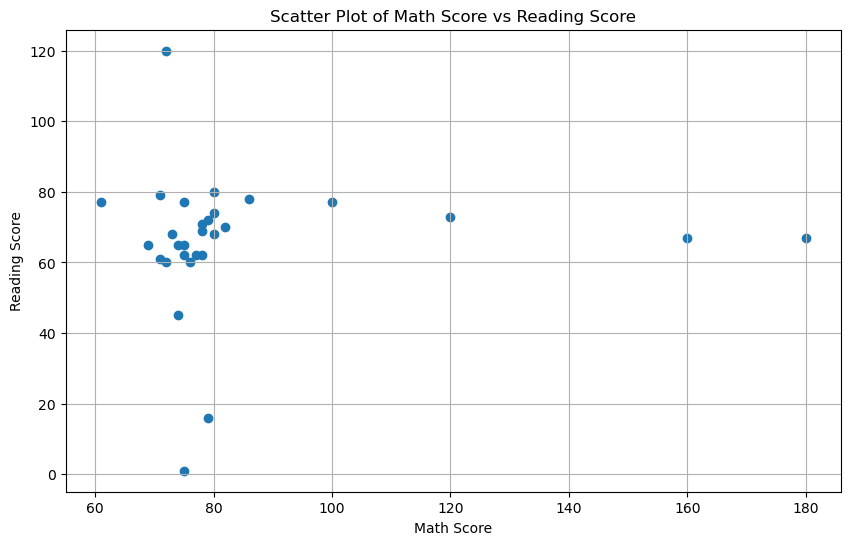

In [13]:
# 2. Detecting outliers using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['math score'], df['reading score'])
plt.title('Scatter Plot of Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.show()

In [22]:
# Define factors for flooring and capping
flooring_factor = 0.5  # Below the 10th percentile value
capping_factor = 1.5   # Above the 90th percentile value

# Find the 10th and 90th percentiles for each column
q10 = df.quantile(0.10)
q90 = df.quantile(0.90)

# Flooring values below the 10th percentile
df_floored = df.apply(lambda x: np.where(x.to_numpy() < q10, q10 * flooring_factor, x))

# Capping values above the 90th percentile
df_capped = df.apply(lambda x: np.where(x.to_numpy() > q90, q90 * capping_factor, x))

# Display the DataFrame after handling outliers
print("DataFrame after handling outliers with Quantile based flooring and capping:")
print(df_floored)
print(df_capped)


ValueError: ('Lengths must match to compare', (6,), (29,))

In [23]:
# Define factors for flooring and capping
flooring_factor = 0.5  # Below the 10th percentile value
capping_factor = 1.5   # Above the 90th percentile value

# Find the 10th and 90th percentiles for each column
q10 = df.quantile(0.10, axis=0)  # Compute the quantile along the columns
q90 = df.quantile(0.90, axis=0)  # Compute the quantile along the columns

# Flooring values below the 10th percentile
df_floored = df.apply(lambda x: np.where(x < q10, q10 * flooring_factor, x))

# Capping values above the 90th percentile
df_capped = df.apply(lambda x: np.where(x > q90, q90 * capping_factor, x))

# Display the DataFrame after handling outliers
print("DataFrame after handling outliers with Quantile based flooring and capping:")
print(df_floored)
print(df_capped)

ValueError: Can only compare identically-labeled Series objects